In [2]:
## This project will create linear regression models for determining the price of used cars based on their characteristics.
## Both a general model and several specific models will be created.

In [3]:
## Packages 

import numpy as np #Linear algebra
import pandas as pd #allows data manipulations and matrices
#pip install mysql-connector-python 
import mysql.connector # SQL connecter
import seaborn as sns #For visialisations
import scipy.stats as stats #Visualisations, statistics
import matplotlib.pyplot as plt #matplotlib for visualisations 
from sklearn.linear_model import LinearRegression #used to add line of best fit


In [4]:
## Using a MySQL connecter to directly query the database and pull in the data we need.
# We do have the option here to query using where statements to optimise speed but the data set is fairly small so we don't need to.


# Establish the connection
connection = mysql.connector.connect(
    host='localhost',          
    user='root',      
    password='root15',  
    database='used_car'   
)

# Create a cursor object
cursor = connection.cursor()

# SQL Query
query = "SELECT * FROM used_car.audi;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
audi = pd.DataFrame(result, columns=column_names)

# Close the cursor and connection
cursor.close()




True

In [5]:
# Repeating for all data we want to collect

# Create a cursor object
cursor = connection.cursor()

# SQL query
query = "SELECT * FROM used_car.bmw;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
bmw = pd.DataFrame(result, columns=column_names)

# Close the cursor and connection
cursor.close()




True

In [6]:

# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.ford;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
ford = pd.DataFrame(result, columns=column_names)



In [7]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.hyundi;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
hyundi = pd.DataFrame(result, columns=column_names)



In [8]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.merc;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
merc = pd.DataFrame(result, columns=column_names)


In [9]:
# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.skoda;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
skoda = pd.DataFrame(result, columns=column_names)


In [10]:

# Create a cursor object
cursor = connection.cursor()

# Query
query = "SELECT * FROM used_car.all_used;"

# Execute the query
cursor.execute(query)

# Fetch all rows from the executed query
result = cursor.fetchall()

# Get column names
column_names = [i[0] for i in cursor.description]

# Create a DataFrame
all_used = pd.DataFrame(result, columns=column_names)


In [12]:
print(all_used)


          model  year  price transmission  mileage fuelType  tax   mpg  \
0            A1  2017  12500       Manual    15735   Petrol  150  55.4   
1            A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2            A1  2016  11000       Manual    29946   Petrol   30  55.4   
3            A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4            A3  2019  17300       Manual     1998   Petrol  145  49.6   
...         ...   ...    ...          ...      ...      ...  ...   ...   
62855      Yeti  2014  11440    Semi-Auto    14569   Petrol  160  44.8   
62856   Octavia  2014  10990    Semi-Auto    49999   Petrol   30  56.5   
62857     Fabia  2017   9500    Semi-Auto    17131   Petrol  145  61.4   
62858    Citigo  2016   5999       Manual    21747   Petrol   20  62.8   
62859     Fabia  2017   9232    Semi-Auto    42530   Petrol   20  60.1   

       engineSize   make  
0             1.4   audi  
1             2.0   audi  
2             1.4   audi  
3  

In [13]:
# Function to list all data frames
def list_dataframes():
    return [var_name for var_name, var_value in globals().items() if isinstance(var_value, pd.DataFrame)]

# List all DataFrames in the current namespace
dataframes = list_dataframes()
print("Available DataFrames:", dataframes)

Available DataFrames: ['_', 'audi', 'bmw', 'ford', 'hyundi', 'merc', 'skoda', 'all_used', '_11']


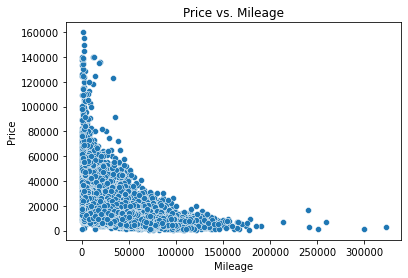

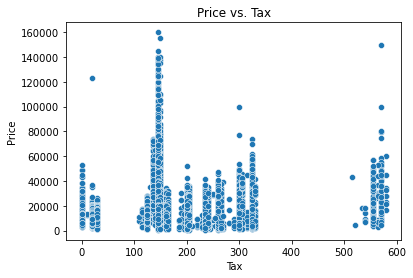

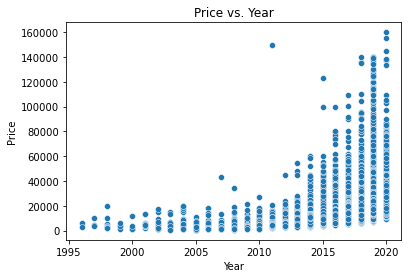

In [16]:
## Visualising data

# Looking for variables that have linear relationships with price
# Pairplot to see relationships.
# Scatter plot of price vs. mileage
sns.scatterplot(data=all_used, x='mileage', y='price')
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter plot of price vs. tax
sns.scatterplot(data=all_used, x='tax', y='price')
plt.title('Price vs. Tax')
plt.xlabel('Tax')
plt.ylabel('Price')
plt.show()

# Scatter plot of price vs. year
sns.scatterplot(data=all_used, x='year', y='price')
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

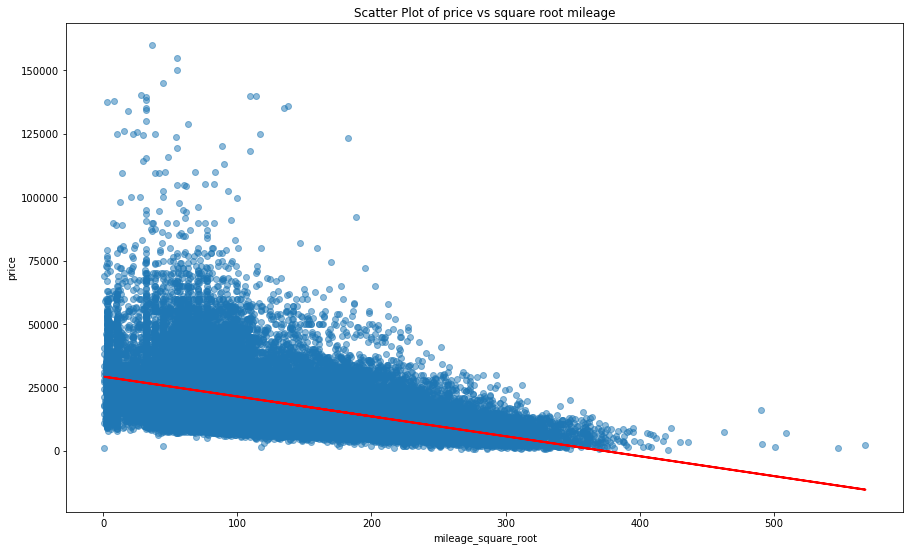

In [17]:
##Transforming variables
# This will add an column containg the square root of mileage
all_used['mileage_square_root'] = np.sqrt(all_used['mileage'])
#Scatterplot of price vs. mileage
plt.figure(figsize=(15, 9))
plt.scatter(all_used['mileage_square_root'], all_used['price'], alpha=0.5)
plt.xlabel('mileage_square_root')
plt.ylabel('price')
plt.title('Scatter Plot of price vs square root mileage')

# Fit linear regression model
X = all_used['mileage_square_root'].values.reshape(-1, 1)
y = all_used['price'].values
model = LinearRegression().fit(X, y)
line = model.predict(X)

# Plot the line of best fit
plt.plot(all_used['mileage_square_root'], line, color='red', linewidth=2, label='Line of Best Fit')

plt.show()

sns.histplot(all_used['price'], bins=10, kde=False)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

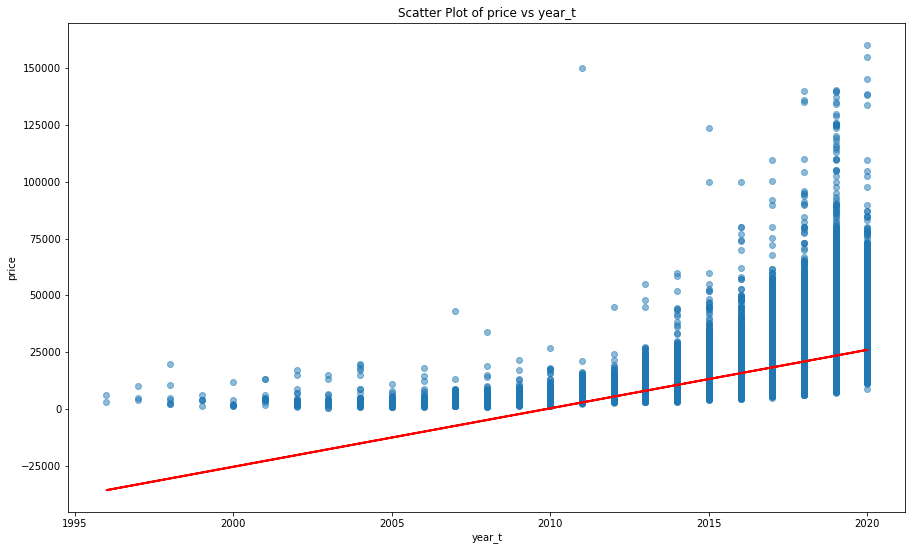

In [38]:
##Transforming variables
# This will add an column containg the square root of mileage
all_used['year_t'] = all_used['year']
#Scatterplot of price vs. mileage
plt.figure(figsize=(15, 9))
plt.scatter(all_used['year_t'], all_used['price'], alpha=0.5)
plt.xlabel('year_t')
plt.ylabel('price')
plt.title('Scatter Plot of price vs year_t')

# Fit linear regression model
X = all_used['year_t'].values.reshape(-1, 1)
y = all_used['price'].values
model = LinearRegression().fit(X, y)
line = model.predict(X)

# Plot the line of best fit
plt.plot(all_used['year_t'], line, color='red', linewidth=2, label='Line of Best Fit')

plt.show()

In [ ]:
## Creating our initial general model for prediciting car prices based on the mileage, year and tax.
## The goal is to create a accurate general model that will work on all cars. This may not be feasible or optimal so individual models based on the brand will be constructed later.

# Import the ols function
from  statsmodels.formula.api  import ols
# Create the model object
car_price = ols('price ~ year + mileage + tax', data=all_used)
# Fit the model
car_price = car_price.fit()

# Print the parameters of the fitted model
print(car_price.params)

In [ ]:
# Reports summary information of the model so we can diagnose whether the model is accurate and/or fitting.
print(car_price.summary())
# Findings:
#-The model is significant and so are its chosen explanatory variables. 
#- Low R^2 value indicates explanetory variables chosen do not fully explain variation in car price
# Durbin-Watson test suggests positive autocorrelation 
# The Note at the bottom of the summary is suggesting multicolinearity or another numerical problem 



In [ ]:
## Lets address multicolinearity by calculating VIF (variance inflation factor)
import statsmodels.api as sm #Stats models 
from statsmodels.stats.outliers_influence import variance_inflation_factor # Used to calculate VIF
X = all_used[["year","mileage","tax"]]
X = sm.add_constant(X)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# Calculate VIF
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Convert VIF to normal number format by rounding
vif_data["VIF"] = vif_data["VIF"].round(2)
print(vif_data)
## The result here suggests that the data doesnt have any multicolinearity 

In [ ]:
#Lets look at the distribution of residuals and figure out if we have heteroskedasticity

fitted_vals = car_price.fittedvalues
residuals = car_price.resid

# Ploting residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_vals, residuals, edgecolor='k', facecolor='none', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [ ]:
import scipy.stats as stats 

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q Plot")
plt.show()

In [ ]:
# Here we will create a visualisation for mileage against price
import seaborn as sns # import seaborn for visualisations 


sns.scatterplot(data=all_used, x='mileage', y='price')
plt.show()



In [ ]:
# Lets create a visualisation of tax and price and add a line of best fit
sns.scatterplot(data=all_used, x='ta x', y='price')
sns.regplot(data=all_used, x='tax', y='price', scatter=False, color='red')
plt.show()
# This creates a plot that 


In [ ]:
sns.scatterplot(data=all_used, x='tax', y='year')
plt.show()

In [ ]:
sns.barplot(data=all_used, x='fuelType', y='tax')
plt.show()

In [ ]:
tax_grouped = all_used.groupby('fuelType')['tax'].agg(['mean', 'median', 'max', 'min'])
tax_grouped['range'] = tax_grouped['max'] - tax_grouped['min']
print(tax_grouped)